In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'C:\Users\durva\Desktop\python smart\assignment\Garbage classification\Garbage classification',target_size=(64,64),
                                          class_mode='categorical',batch_size=100)

Found 2527 images belonging to 6 classes.


In [5]:
len(x_train)

26

In [6]:
x_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Importing Libraries

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Creating Model

In [8]:
model=Sequential()

Adding Layers

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
##Hidden Layer 1
model.add(Dense(300,activation='relu'))
##Hidden Layer 2
model.add(Dense(150,activation='relu'))

Output Layer

In [13]:
model.add(Dense(6,activation='softmax'))

Compile the model

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [15]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)

C:\Users\durva\AppData\Local\Temp/ipykernel_23648/3129788946.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)


Epoch 1/10
26/26 [==============================] - 14s 487ms/step - loss: 2.1912 - accuracy: 0.2319
Epoch 2/10
26/26 [==============================] - 10s 396ms/step - loss: 1.4671 - accuracy: 0.4294
Epoch 3/10
26/26 [==============================] - 10s 371ms/step - loss: 1.2642 - accuracy: 0.5069
Epoch 4/10
26/26 [==============================] - 10s 361ms/step - loss: 1.2036 - accuracy: 0.5307
Epoch 5/10
26/26 [==============================] - 10s 380ms/step - loss: 1.1260 - accuracy: 0.5659
Epoch 6/10
26/26 [==============================] - 10s 394ms/step - loss: 1.0551 - accuracy: 0.6078
Epoch 7/10
26/26 [==============================] - 10s 377ms/step - loss: 0.9984 - accuracy: 0.6308
Epoch 8/10
26/26 [==============================] - 10s 365ms/step - loss: 1.0048 - accuracy: 0.6233
Epoch 9/10
26/26 [==============================] - 10s 369ms/step - loss: 0.9509 - accuracy: 0.6518
Epoch 10/10
26/26 [==============================] - 10s 373ms/step - loss: 0.8933 - accura

Save the model


In [16]:
model.save('garbage.h5')

Testing the model

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('garbage.h5')
img=image.load_img(r'C:\Users\durva\Desktop\python smart\assignment\Garbage classification\Garbage classification\paper\paper8.jpg',
                   target_size=(64,64))

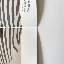

In [19]:
img

In [20]:
x=image.img_to_array(img)

In [21]:
x

array([[[ 98.,  91.,  85.],
        [221., 222., 214.],
        [ 94.,  90.,  79.],
        ...,
        [217., 216., 214.],
        [218., 217., 215.],
        [217., 216., 214.]],

       [[115., 108., 102.],
        [223., 224., 216.],
        [ 90.,  86.,  75.],
        ...,
        [217., 216., 214.],
        [217., 216., 214.],
        [216., 215., 213.]],

       [[153., 146., 140.],
        [221., 222., 214.],
        [ 93.,  89.,  78.],
        ...,
        [216., 215., 213.],
        [217., 216., 214.],
        [214., 213., 211.]],

       ...,

       [[200., 192., 181.],
        [164., 156., 145.],
        [205., 197., 186.],
        ...,
        [203., 204., 206.],
        [203., 203., 205.],
        [203., 203., 205.]],

       [[201., 193., 182.],
        [210., 202., 191.],
        [202., 194., 183.],
        ...,
        [203., 204., 206.],
        [205., 205., 207.],
        [205., 205., 207.]],

       [[126., 118., 107.],
        [207., 199., 188.],
        [120., 1

In [22]:
x.ndim

3

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[ 98.,  91.,  85.],
         [221., 222., 214.],
         [ 94.,  90.,  79.],
         ...,
         [217., 216., 214.],
         [218., 217., 215.],
         [217., 216., 214.]],

        [[115., 108., 102.],
         [223., 224., 216.],
         [ 90.,  86.,  75.],
         ...,
         [217., 216., 214.],
         [217., 216., 214.],
         [216., 215., 213.]],

        [[153., 146., 140.],
         [221., 222., 214.],
         [ 93.,  89.,  78.],
         ...,
         [216., 215., 213.],
         [217., 216., 214.],
         [214., 213., 211.]],

        ...,

        [[200., 192., 181.],
         [164., 156., 145.],
         [205., 197., 186.],
         ...,
         [203., 204., 206.],
         [203., 203., 205.],
         [203., 203., 205.]],

        [[201., 193., 182.],
         [210., 202., 191.],
         [202., 194., 183.],
         ...,
         [203., 204., 206.],
         [205., 205., 207.],
         [205., 205., 207.]],

        [[126., 118., 107.],
       

In [25]:
x.ndim

4

In [26]:
pred=np.argmax(model.predict(x),axis=1)

In [27]:
pred

array([3], dtype=int64)

In [28]:
index=['cardboard','glass','metal','paper','plastic','trash']
print(index[pred[0]])

paper


Open CV

In [29]:
import cv2

In [30]:
img=cv2.imread(r'C:\Users\durva\Desktop\python smart\assignment\Garbage classification\Garbage classification\paper\paper8.jpg',1)

In [31]:
img

array([[[ 85,  90,  99],
        [ 89,  94, 103],
        [ 81,  86,  95],
        ...,
        [214, 216, 217],
        [214, 216, 217],
        [214, 216, 217]],

       [[ 85,  90,  99],
        [ 89,  94, 103],
        [ 82,  87,  96],
        ...,
        [214, 216, 217],
        [214, 216, 217],
        [214, 216, 217]],

       [[ 84,  89,  98],
        [ 88,  93, 102],
        [ 84,  89,  98],
        ...,
        [214, 216, 217],
        [214, 216, 217],
        [214, 216, 217]],

       ...,

       [[ 74,  85,  93],
        [ 79,  90,  98],
        [ 80,  91,  99],
        ...,
        [207, 205, 205],
        [206, 204, 204],
        [206, 204, 204]],

       [[ 75,  86,  94],
        [ 79,  90,  98],
        [ 78,  89,  97],
        ...,
        [209, 207, 207],
        [208, 206, 206],
        [208, 206, 206]],

       [[ 77,  88,  96],
        [ 78,  89,  97],
        [ 76,  87,  95],
        ...,
        [210, 208, 208],
        [211, 209, 209],
        [211, 209, 209]]

In [32]:
img1=cv2.imread(r'C:\Users\durva\Desktop\python smart\assignment\Garbage classification\Garbage classification\paper\paper8.jpg',0)

In [33]:
img1

array([[ 92,  96,  88, ..., 216, 216, 216],
       [ 92,  96,  89, ..., 216, 216, 216],
       [ 91,  95,  91, ..., 216, 216, 216],
       ...,
       [ 86,  91,  92, ..., 205, 204, 204],
       [ 87,  91,  90, ..., 207, 206, 206],
       [ 89,  90,  88, ..., 208, 209, 209]], dtype=uint8)

In [34]:
print(img.shape)

(384, 512, 3)


In [ ]:
img=cv2.imread(r'C:\Users\durva\Desktop\python smart\assignment\Garbage classification\Garbage classification\paper\paper8.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CNN Video Analysis

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('garbage.h5')
video=cv2.VideoCapture(0)
index=['cardboard','glass','metal','paper','plastic','trash']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The Predicted Garbage is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()  